In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

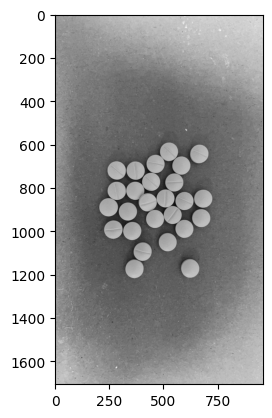

In [60]:
image = cv2.imread('./imgfiles/S__58916873.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

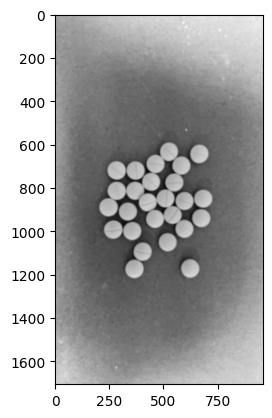

In [61]:
blur = cv2.GaussianBlur(gray, (15, 15), 0)
plt.imshow(blur, cmap='gray')

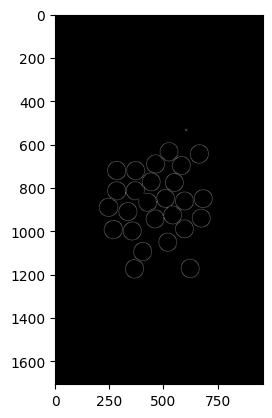

In [66]:
canny = cv2.Canny(blur, 30, 150, 3)
plt.imshow(canny, cmap='gray')

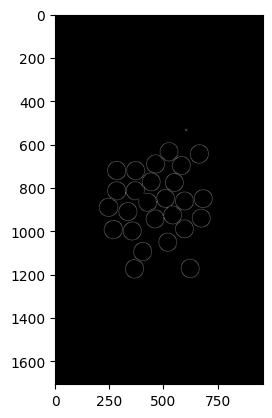

In [67]:
dilated = cv2.dilate(canny, (1, 1), iterations=0)
plt.imshow(dilated, cmap='gray')

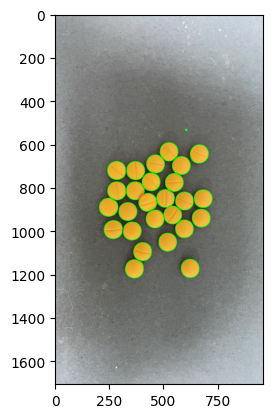

In [68]:
(cnt, hierarchy) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

plt.imshow(rgb)

In [69]:
print("coins in the image : ", len(cnt))


coins in the image :  30


pills in the image :  27


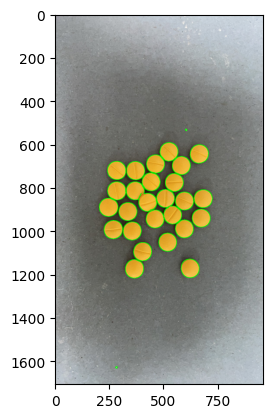

In [70]:
image = cv2.imread('./imgfiles/S__58916873.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (11, 11), 0)
canny = cv2.Canny(blur, 50, 150, 3)
dilated = cv2.dilate(canny, (1, 1), iterations=0)

(cnt, hierarchy) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

plt.imshow(rgb)
print("pills in the image : ", len(cnt))